# **DGA Botnet Detection** 

Sonali Shripad Shanbhag (19BDS0114) , Sona Ann Joseph (19BCE2262), Riddhi Gupta (19BCE2273) and Pranay Kumawat (19BCE2244)


### Step 1: Import required libraries, packages and corpora

In [1]:
import pandas as pd
import numpy as np
import re 
import nltk
import sklearn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Download the corpus of stopwords from NLTK (Natural Language Toolkit)
nltk.download("stopwords") 
#Instantiate ProterStemmer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 2. Read the dataset

In [3]:
dataset = pd.read_csv("C:\\Users\\sonali\\Downloads\\mixed_domains.csv")

In [4]:
dataset.head()

,DGA_family,Domain,Type
0,banjori,vrxhererwyatanb.com,DGA
1,banjori,rjdwmachuslazaroqok.com,DGA
2,none,mte.gov.br,Normal
3,none,animefangirl00.tumblr.com,Normal
4,none,seacenter.ir,Normal


### Step 3. Data Pre-Processing

In [5]:
dataset.shape

(20000, 3)

In [6]:
x=dataset.iloc[:, 0:-1]
y=dataset.iloc[:,-1]
y

0           DGA
1           DGA
2        Normal
3        Normal
4        Normal
          ...  
19995       DGA
19996       DGA
19997    Normal
19998       DGA
19999       DGA
Name: Type, Length: 20000, dtype: object

#### i. Check for Missing Values (NaN)

In [7]:
dataset = dataset.dropna(how='any',axis=0) 

In [8]:
dataset.isnull().sum()

DGA_family    0
Domain        0
Type          0
dtype: int64

#### ii. Pre-Processing Function

Using Regular Expressions, remove all non-textual data including symbols, special characters, emojis and numbers.
Normalize the case by converting all to lower case.
Split the sentences into words, reduce the words to their stems and remove any stop words.
Rejoin the split words with a whitespace to form a simple, cleaned sentence.


In [9]:
def preprocess_column(col_name, col_length):
  preprocessed_data = []
  for i in range(0,col_length):
        col_value = dataset[col_name][i]
        col_value = re.sub('[^a-zA-Z]', ' ', col_value)
        col_value = col_value.lower()
        col_value = col_value.split()
        col_value = [ps.stem(word) for word in col_value if not word in set(stopwords.words('english'))]
        col_value = ' '.join(col_value)
        preprocessed_data.append(col_value)
  return preprocessed_data

In [10]:
#Calling the function for column "Domain"
preprocessed_domain = preprocess_column("Domain",20000)

#### iii. Feature Extraction using Count Vectorizer

Convert a collection of text documents to a sparse matrix representation of token counts. Or, quite simply, it is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [11]:
cv = CountVectorizer(max_features = 200)
x = cv.fit_transform(preprocessed_domain).toarray() #preprocessed data in the form of a sparse matrix
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### iv. Handling Categorical Values- Label Encoding
Replace the categories in the dependent (y) column with numeric values for easier processing in the machine-readable form.
Here, we have "Real" and "Fake" which will be assigned values "1" and "0" respectively (according to alphabetical order)

In [12]:
le=LabelEncoder()
dataset['Type']=le.fit_transform(dataset['Type'])
dataset['DGA_family']=le.fit_transform(dataset['DGA_family'])
dga_family=dataset['DGA_family']
dga_family

0         5
1         5
2        26
3        26
4        26
         ..
19995    47
19996    36
19997    26
19998    14
19999    25
Name: DGA_family, Length: 20000, dtype: int32

### Step 5. Split the dataset into Train and Test sets

Here, we are using a 20-80 ratio, assigning an alias of "0" to this particular random state.

In [13]:
new_x=pd.DataFrame(x,dga_family)
new_x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
DGA_family,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = dataset['Type']
y

0        0
1        0
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    1
19998    0
19999    0
Name: Type, Length: 20000, dtype: int32

In [15]:
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16000, 200)
(16000,)
(4000, 200)
(4000,)


### **Logistic Regression**

It is a classification algorithm in machine learning that uses one or more independent variables to determine an outcome. The outcome is measured with a dichotomous variable which means it will have only two possible outcomes. For example, it may be used to determine if an email is spam or not, using the rate of misspelled words, a common sign of spam.

Here, we are using it to detect whether the domain name is **DGA** or **Normal**. 

In [17]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(y_test, lr_ypred)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

Logistic Regression Accuracy: 
72.7 %


In [18]:
# pr= lr.predict(cv.transform([text_cleaner(headline2)]))
# if pr>0.5:
#   print("Normal")
# else:
#   print("DGA!!!!!!!!!!")

### **Naive Bayes Classifier**

Naive Bayes algorithm is based on Bayes’ theorem with the assumption of independence between every pair of features. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if the features depend on each other, all of these properties contribute to the probability independently.

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(y_test,nb_ypred)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
48.55 %


### **Stochastic Gradient Descent**

Stochastic Gradient Descent is particularly useful when the sample data is in a large number. It supports different loss functions and penalties for classification. It refers to calculating the derivative from each training data instance and calculating the update immediately and it also iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network.

In [20]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(y_test,sgd_ypred)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

Stochastic Gradient Descent Accuracy: 
66.64999999999999 %


### **K-Nearest Neighbour**

Nearest-Neighbour based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the 'k' nearest neighbours of each point.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(y_test,knn_ypred)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

K-Nearest Neighbour Accuracy: 
73.175 %


### **Decision Tree**

Decision Tree builds models in the form of a tree structure. It classifies data into finer and finer categories: from tree trunk to branches to leaves. It uses the if-then rule of mathematics to create sub-categories that fit into broader categories and allows for precise, organic categorization.

In [22]:
from sklearn.tree import DecisionTreeClassifier
#Note: tweak values for max acc
dtree=DecisionTreeClassifier(max_depth=40,random_state=18,max_features=None, min_samples_leaf=8)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(y_test,dtree_ypred)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
72.225 %


### **Random Forest** 

Random decision trees or random forest are an ensemble learning method for classification, regression, etc.  meaning that a random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=75,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(y_test,rfm_ypred)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

Random Forest Accuracy: 
73.25 %


### **Support Vector Machine**

Support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. New points are then added to space by predicting which category they fall into and which space they will belong to.



In [24]:
from sklearn.svm import SVC 
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(y_test,svm_ypred)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

Support Vector Machine Accuracy: 
70.625 %


## Confusion Matrix

In [25]:
# Logistic Regression

cm_lr = confusion_matrix(y_test, lr_ypred)
print('For Logistic Regression')
print('Confusion Matrix: ')
print(cm_lr)
acc_lr = accuracy_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred)
rec_lr = recall_score(y_test, lr_ypred)
f1_lr = f1_score(y_test, lr_ypred)
print('Accuracy Score: ',acc_lr)
print('Precision Score: ',pre_lr)
print('Recall Score: ',rec_lr)
print('F1 Score: ',f1_lr)

For Logistic Regression
Confusion Matrix: 
[[2298   90]
 [1002  610]]
Accuracy Score:  0.727
Precision Score:  0.8714285714285714
Recall Score:  0.3784119106699752
F1 Score:  0.527681660899654


In [26]:
# Naive Bayes

cm_nb = confusion_matrix(y_test, nb_ypred)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_nb)
acc_nb = accuracy_score(y_test, nb_ypred)
pre_nb = precision_score(y_test, nb_ypred)
rec_nb = recall_score(y_test, nb_ypred)
f1_nb = f1_score(y_test, nb_ypred)
print('Accuracy Score: ',acc_nb)
print('Precision Score: ',pre_nb)
print('Recall Score: ',rec_nb)
print('F1 Score: ',f1_nb)

For Naive Bayes
Confusion Matrix: 
[[ 364 2024]
 [  34 1578]]
Accuracy Score:  0.4855
Precision Score:  0.43808995002776235
Recall Score:  0.9789081885856079
F1 Score:  0.6052934407364786


In [27]:
# Stochastic Gradient Descent

cm_sgd = confusion_matrix(y_test, sgd_ypred)
print('For Stochastic Gradient Descent')
print('Confusion Matrix: ')
print(cm_sgd)
acc_sgd = accuracy_score(y_test, sgd_ypred)
pre_sgd = precision_score(y_test, sgd_ypred)
rec_sgd = recall_score(y_test, sgd_ypred)
f1_sgd = f1_score(y_test, sgd_ypred)
print('Accuracy Score: ',acc_sgd)
print('Precision Score: ',pre_sgd)
print('Recall Score: ',rec_sgd)
print('F1 Score: ',f1_sgd)

For Stochastic Gradient Descent
Confusion Matrix: 
[[1228 1160]
 [ 174 1438]]
Accuracy Score:  0.6665
Precision Score:  0.5535026943802925
Recall Score:  0.892059553349876
F1 Score:  0.6831353919239904


In [28]:
# KNN 

cm_knn = confusion_matrix(y_test, knn_ypred)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
acc_knn = accuracy_score(y_test, knn_ypred)
pre_knn = precision_score(y_test, knn_ypred)
rec_knn = recall_score(y_test, knn_ypred)
f1_knn = f1_score(y_test, knn_ypred)
print('Accuracy Score: ',acc_knn)
print('Precision Score: ',pre_knn)
print('Recall Score: ',rec_knn)
print('F1 Score: ',f1_knn)

For KNN
Confusion Matrix: 
[[2321   67]
 [1006  606]]
Accuracy Score:  0.73175
Precision Score:  0.9004457652303121
Recall Score:  0.3759305210918114
F1 Score:  0.5304157549234135


In [29]:
# Decision Tree

cm_dtree = confusion_matrix(y_test, dtree_ypred)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dtree)
acc_dtree = accuracy_score(y_test, dtree_ypred)
pre_dtree = precision_score(y_test, dtree_ypred)
rec_dtree = recall_score(y_test, dtree_ypred)
f1_dtree = f1_score(y_test, dtree_ypred)
print('Accuracy Score: ',acc_dtree)
print('Precision Score: ',pre_dtree)
print('Recall Score: ',rec_dtree)
print('F1 Score: ',f1_dtree)

For Decision Tree
Confusion Matrix: 
[[2318   70]
 [1041  571]]
Accuracy Score:  0.72225
Precision Score:  0.890795631825273
Recall Score:  0.3542183622828784
F1 Score:  0.5068797159343097


In [30]:
# Random Forest

cm_rfm = confusion_matrix(y_test, rfm_ypred)
print('For Random Forest')
print('Confusion Matrix: ')
print(cm_rfm)
acc_rfm = accuracy_score(y_test, rfm_ypred)
pre_rfm = precision_score(y_test, rfm_ypred)
rec_rfm = recall_score(y_test, rfm_ypred)
f1_rfm = f1_score(y_test, rfm_ypred)
print('Accuracy Score: ',acc_rfm)
print('Precision Score: ',pre_rfm)
print('Recall Score: ',rec_rfm)
print('F1 Score: ',f1_rfm)

For Random Forest
Confusion Matrix: 
[[2323   65]
 [1005  607]]
Accuracy Score:  0.7325
Precision Score:  0.9032738095238095
Recall Score:  0.37655086848635233
F1 Score:  0.531523642732049


In [31]:
# SVM

cm_svm = confusion_matrix(y_test, svm_ypred)
print('For SVM')
print('Confusion Matrix: ')
print(cm_svm)
acc_svm = accuracy_score(y_test, svm_ypred)
pre_svm = precision_score(y_test, svm_ypred)
rec_svm = recall_score(y_test, svm_ypred)
f1_svm = f1_score(y_test, svm_ypred)
print('Accuracy Score: ',acc_svm)
print('Precision Score: ',pre_svm)
print('Recall Score: ',rec_svm)
print('F1 Score: ',f1_svm)

For SVM
Confusion Matrix: 
[[2263  125]
 [1050  562]]
Accuracy Score:  0.70625
Precision Score:  0.8180494905385735
Recall Score:  0.34863523573200994
F1 Score:  0.4889082209656373


## Classification Report

In [32]:
targetNames=['DGA', 'Normal']

In [33]:
print('For LR')
print(classification_report(y_test, lr_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SGD')
print(classification_report(y_test, sgd_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))

For LR
              precision    recall  f1-score   support

         DGA       0.70      0.96      0.81      2388
      Normal       0.87      0.38      0.53      1612

    accuracy                           0.73      4000
   macro avg       0.78      0.67      0.67      4000
weighted avg       0.77      0.73      0.70      4000

-----------------------------------------------------------------
For Naive Bayes
              precision    recall  f1-score   support

         DGA       0.91      0.15      0.26      2388
      Normal       0.44      0.98      0.61      1612

    accuracy                           0.49      4000
   macro avg       0.68      0.57      0.43      4000
weighted avg       0.72      0.49      0.40      4000

-----------------------------------------------------------------
For SGD
              precision    recall  f1-score   support

         DGA       0.88      0.51      0.65      2388
      Normal       0.55      0.89      0.68      1612

    accuracy       

## Heat Map

For Logistic Regression, Confusion Matrix: 
[[2298   90]
 [1002  610]]


<AxesSubplot:>

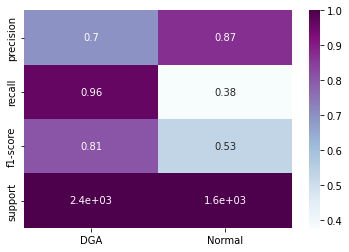

In [34]:
# Logistic Regression

clf_report_lr = classification_report(y_test, lr_ypred, target_names=targetNames, output_dict= True)
cleaned_report_lr = {}

cleaned_report_lr['DGA'] = clf_report_lr['DGA']
cleaned_report_lr['Normal'] = clf_report_lr['Normal']

print('For Logistic Regression, Confusion Matrix: ')
print(cm_lr)
sns.heatmap(pd.DataFrame(cleaned_report_lr), annot=True, vmax=1.0, cmap="BuPu")

For Naive Bayes, Confusion Matrix: 
[[ 364 2024]
 [  34 1578]]


<AxesSubplot:>

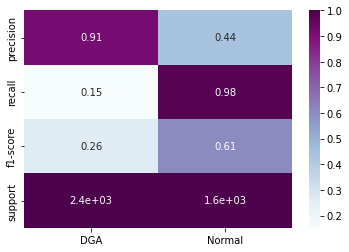

In [35]:
# Naive Bayes

clf_report_nb = classification_report(y_test, nb_ypred, target_names=targetNames, output_dict= True)
cleaned_report_nb = {}

cleaned_report_nb['DGA'] = clf_report_nb['DGA']
cleaned_report_nb['Normal'] = clf_report_nb['Normal']


print('For Naive Bayes, Confusion Matrix: ')
print(cm_nb)
sns.heatmap(pd.DataFrame(cleaned_report_nb), annot=True, vmax=1.0, cmap="BuPu")

For Stochastic Gradient Descent, Confusion Matrix: 
[[1228 1160]
 [ 174 1438]]


<AxesSubplot:>

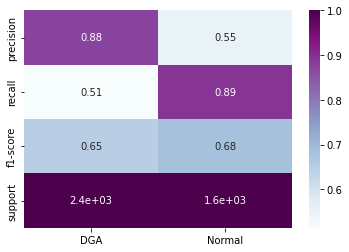

In [36]:
# Stochastic Gradient Descent

clf_report_sgd = classification_report(y_test, sgd_ypred, target_names=targetNames, output_dict= True)
cleaned_report_sgd = {}

cleaned_report_sgd['DGA'] = clf_report_sgd['DGA']
cleaned_report_sgd['Normal'] = clf_report_sgd['Normal']


print('For Stochastic Gradient Descent, Confusion Matrix: ')
print(cm_sgd)
sns.heatmap(pd.DataFrame(cleaned_report_sgd), annot=True, vmax=1.0, cmap="BuPu")

For KNN, Confusion Matrix: 
[[2321   67]
 [1006  606]]


<AxesSubplot:>

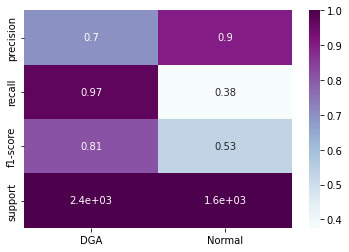

In [37]:
# KNN

clf_report_knn = classification_report(y_test, knn_ypred, target_names=targetNames, output_dict= True)
cleaned_report_knn = {}

cleaned_report_knn['DGA'] = clf_report_knn['DGA']
cleaned_report_knn['Normal'] = clf_report_knn['Normal']

print('For KNN, Confusion Matrix: ')
print(cm_knn)
sns.heatmap(pd.DataFrame(cleaned_report_knn), annot=True, vmax=1.0, cmap="BuPu")

For Decision Tree, Confusion Matrix: 
[[2318   70]
 [1041  571]]


<AxesSubplot:>

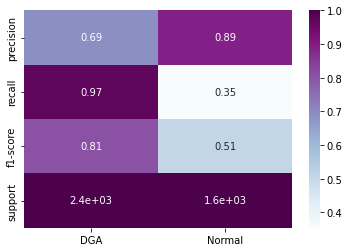

In [38]:
# Decision Tree

clf_report_dtree = classification_report(y_test, dtree_ypred, target_names=targetNames, output_dict= True)
cleaned_report_dtree = {}

cleaned_report_dtree['DGA'] = clf_report_dtree['DGA']
cleaned_report_dtree['Normal'] = clf_report_dtree['Normal']

print('For Decision Tree, Confusion Matrix: ')
print(cm_dtree)
sns.heatmap(pd.DataFrame(cleaned_report_dtree), annot=True, vmax=1.0, cmap="BuPu")

For Random Forest, Confusion Matrix: 
[[2323   65]
 [1005  607]]


<AxesSubplot:>

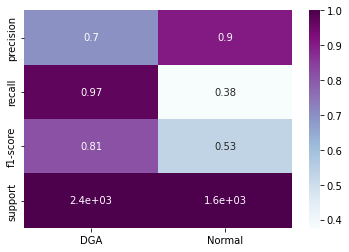

In [39]:
# Random Forest

clf_report_rfm = classification_report(y_test, rfm_ypred, target_names=targetNames, output_dict= True)
cleaned_report_rfm = {}

cleaned_report_rfm['DGA'] = clf_report_rfm['DGA']
cleaned_report_rfm['Normal'] = clf_report_rfm['Normal']

print('For Random Forest, Confusion Matrix: ')
print(cm_rfm)
sns.heatmap(pd.DataFrame(cleaned_report_rfm), annot=True, vmax=1.0, cmap="BuPu")

For SVM, Confusion Matrix: 
[[2263  125]
 [1050  562]]


<AxesSubplot:>

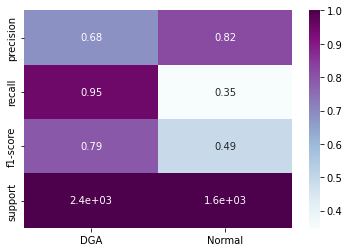

In [40]:
# SVM

clf_report_svm = classification_report(y_test, svm_ypred, target_names=targetNames, output_dict= True)
cleaned_report_svm = {}

cleaned_report_svm['DGA'] = clf_report_svm['DGA']
cleaned_report_svm['Normal'] = clf_report_svm['Normal']

print('For SVM, Confusion Matrix: ')
print(cm_svm)
sns.heatmap(pd.DataFrame(cleaned_report_svm), annot=True, vmax=1.0, cmap="BuPu")

## Visualization of Algorithm Evaluation Metrics

In [41]:
accuracies = {"LR": acc_lr,  
             "Naive": acc_nb, 
             "SGD": acc_sgd,
             "KNN": acc_knn, 
             "DT": acc_dtree,
            "RFM": acc_rfm,
            "SVM": acc_svm, 
             }

precisions = {"LR": pre_lr,  
             "Naive": pre_nb, 
             "SGD": pre_sgd,
             "KNN": pre_knn, 
             "DT": pre_dtree,
            "RFM": pre_rfm,
            "SVM": pre_svm,
             }

recalls = {"LR": rec_lr,  
             "Naive": rec_nb, 
             "SGD": rec_sgd,
             "KNN": rec_knn, 
             "DT": rec_dtree,
            "RFM": rec_rfm,
            "SVM": rec_svm
             }

f1s = {"LR": f1_lr,  
        "Naive": f1_nb, 
        "SGD": f1_sgd,
        "KNN": f1_knn, 
        "DT": f1_dtree,
      "RFM": f1_rfm,
      "SVM": f1_svm
        }

In [42]:
print("Classification models in descending order of Accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Accuracy:


[('RFM', 0.7325),
 ('KNN', 0.73175),
 ('LR', 0.727),
 ('DT', 0.72225),
 ('SVM', 0.70625),
 ('SGD', 0.6665),
 ('Naive', 0.4855)]

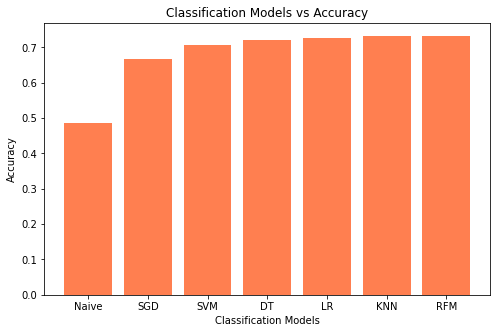

In [43]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="coral")
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [44]:
print("Classification models in descending order of Precision:")
sorted(precisions.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Precision:


[('RFM', 0.9032738095238095),
 ('KNN', 0.9004457652303121),
 ('DT', 0.890795631825273),
 ('LR', 0.8714285714285714),
 ('SVM', 0.8180494905385735),
 ('SGD', 0.5535026943802925),
 ('Naive', 0.43808995002776235)]

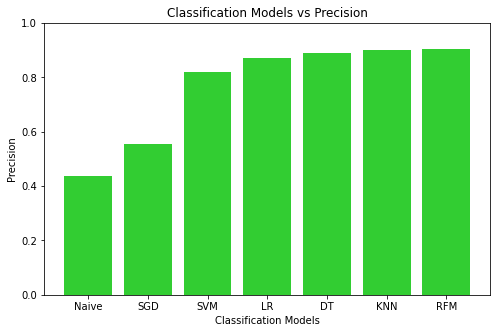

In [45]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="limegreen")
plt.ylim(0,1)
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

In [46]:
print("Classification models in descending order of Recall:")
sorted(recalls.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Recall:


[('Naive', 0.9789081885856079),
 ('SGD', 0.892059553349876),
 ('LR', 0.3784119106699752),
 ('RFM', 0.37655086848635233),
 ('KNN', 0.3759305210918114),
 ('DT', 0.3542183622828784),
 ('SVM', 0.34863523573200994)]

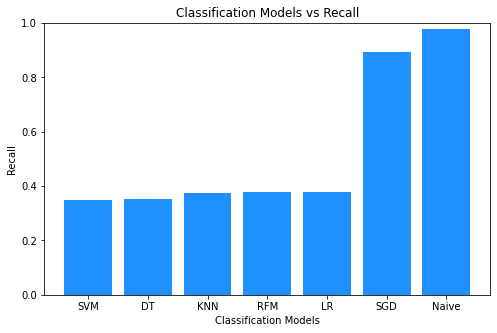

In [47]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

In [48]:
print("Classification models in descending order of F1:")
sorted(f1s.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of F1:


[('SGD', 0.6831353919239904),
 ('Naive', 0.6052934407364786),
 ('RFM', 0.531523642732049),
 ('KNN', 0.5304157549234135),
 ('LR', 0.527681660899654),
 ('DT', 0.5068797159343097),
 ('SVM', 0.4889082209656373)]

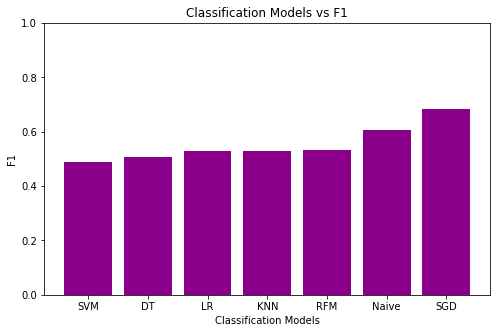

In [49]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.ylim(0,1)
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

### Save the model as a .h5 file

Since this model has the highest accuracy, we will be using this for the prediction during the deployment of our application.

In [50]:
#Using a Logistic Regression Model
model = LogisticRegression()
log_reg = model.fit(x_train,y_train)
logRegre_ypred= model.predict(x_test)

In [51]:
from keras.models import load_model
import pickle

pickle.dump(model, open("dga_botnet.h5", 'wb'))
with open('vectorizer_lr', 'wb') as fin:
    pickle.dump(model, fin)

## Deep Learning Classifiers

### **Artificial Neural Networks (ANN)**

A neural network has many layers and each layer performs a specific function, and as the complexity of the model increases, the number of layers also increases that why it is known as the multi-layer perceptron.The purest form of a neural network has three layers input layer, the hidden layer, and the output layer. The input layer picks up the input signals and transfers them to the next layer and finally, the output layer gives the final prediction and these neural networks have to be trained with some training data as well like machine learning algorithms before providing a particular problem. 

In [52]:
from keras.layers import *
ann_model = Sequential()
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(x_train,y_train.astype(str).astype(int),batch_size=32,epochs=10)
acc= ann_model.evaluate(x_train, y_train.astype(str).astype(int))
ann_ypred=ann_model.predict(x_test)
print("ANN Model Accuracy: ")
ann_acc=acc[1]
print(ann_acc*100,"%")

Epoch 1/10
500/500 [==============================] - 5s 3ms/step - loss: 0.6072 - accuracy: 0.6146
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5571 - accuracy: 0.6533
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.6884
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5003 - accuracy: 0.7172
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4906 - accuracy: 0.7194
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.7228
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7232
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4828 - accuracy: 0.7258
Epoch 9/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4814 - accuracy: 0.7257
Epoch 10/10
500/500 [==============================] - 2s 2ms/step - loss: 0.4789 - accuracy: 0.7269

In [53]:
# ANN
a= ann_ypred>0.5
a = a.astype('uint8')
cm_ann = confusion_matrix(y_test, a)
print('For ANN')
print('Confusion Matrix: ')
print(cm_ann)
acc_ann = accuracy_score(y_test, a)
pre_ann = precision_score(y_test, a)
rec_ann = recall_score(y_test, a)
f1_ann = f1_score(y_test, a)
spec_ann = cm_ann[1,1]/(cm_ann[1,0]+cm_ann[1,1])
print('Accuracy Score: ',acc_ann)
print('Precision Score: ',pre_ann)
print('Recall Score: ',rec_ann)
print('F1 Score: ',f1_ann)
print('Specificity: ', spec_ann)

For ANN
Confusion Matrix: 
[[2303   85]
 [1010  602]]
Accuracy Score:  0.72625
Precision Score:  0.87627365356623
Recall Score:  0.37344913151364767
F1 Score:  0.5237059591126576
Specificity:  0.37344913151364767


#### Additional reshaping for CNN and LSTM

In [54]:
x_train = np.random.uniform(0,1, (16000,200))
y_train = np.random.randint(0,2, 16000)

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

### Convolutional Neural Networks (CNN)

Convolutional neural network is a class of deep neural networks, most commonly applied to analyze visual imagery. It uses a special technique called Convolution which is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

In [55]:
inp = Input(shape=(1,200))
conv2 = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(inp)
drop21 = Dropout(0.5)(conv2)
conv22 = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(drop21)
drop22 = Dropout(0.5)(conv22)
pool2 = Flatten()(drop22)
out = Dense(1, activation='softmax')(pool2)
cnn_model = Model(inp, out)
cnn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=10)
acc= cnn_model.evaluate(x_train, y_train)
cnn_ypred=cnn_model.predict(x_test)
print("CNN Model Accuracy: ")
cnn_acc=acc[1]
print(cnn_acc*100,"%")

Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 0.6961 - accuracy: 0.5049
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6936 - accuracy: 0.5049
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6936 - accuracy: 0.5049
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5049
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5049
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6934 - accuracy: 0.5049
Epoch 7/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6933 - accuracy: 0.5049
Epoch 8/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5049
Epoch 9/10
500/500 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5049
Epoch 10/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5049

### Bidirectional Long Short-Term Memory 

Bidirectional long-short term memory is the process of making any neural network have the sequence information in both directions backwards (future to past) or forward (past to future). In bidirectional, input flows in two directions, making a bi-lstm different from the regular LSTM.


In [56]:
lstm_model=Sequential()
lstm_model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape=(1, 200)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())
lstm_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)
acc= lstm_model.evaluate(x_train, y_train)
print("LSTM Model Accuracy: ")
lstm_ypred=lstm_model.predict(x_test)
lstm_acc=acc[1]
print(lstm_acc*100,"%")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 241,001
Trainable params: 241,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
250/250 [==============================] - 12s 16ms/step - loss: 0.6964 - accuracy: 0.4955 - val_loss: 0.6935 - val_accuracy: 0.4187
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.6936 - accuracy: 0.5052 - val_loss: 0.6925 - val_accuracy: 0.5520
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.6928 - accu

## Recurrent Neural Networks (RNN)

A recurrent neural network is a type of artificial neural network which uses sequential data or time series data. Recurrent neural networks utilize training data to learn. They are distinguished by their “memory” as they take information from prior inputs to influence the current input and output. The output of recurrent neural networks depend on the prior elements within the sequence. 

In [57]:
x = layers.Input(shape=(1, 200))
cell = layers.SimpleRNNCell(4, activation='tanh')  
rnn = layers.RNN(cell)
rnn_output = rnn(x)
output = Dense(units=1, activation='sigmoid')(rnn_output)
rnn_model = Model(inputs=x, outputs=output)
rnn_model.compile(loss="binary_crossentropy", metrics=["accuracy"])
rnn_model.summary()
H = rnn_model.fit(x_train, y_train, epochs=10)
acc= rnn_model.evaluate(x_train, y_train)
print("RNN Model Accuracy: ")
rnn_ypred=rnn_model.predict(x_test)
rnn_acc=acc[1]
print(rnn_acc*100,"%")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 200)]          0         
_________________________________________________________________
rnn (RNN)                    (None, 4)                 820       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 3ms/step - loss: 0.7009 - accuracy: 0.4988
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5062
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5119
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy

# Confusion Matrix

In [58]:
c= cnn_ypred.astype(int)
np.unique(np.array(c))

array([1])

In [59]:
# CNN
cm_cnn = confusion_matrix(y_test, c)
print('For CNN')
print('Confusion Matrix: ')
print(cm_cnn)
acc_cnn = accuracy_score(y_test, c)
pre_cnn = precision_score(y_test, c)
rec_cnn = recall_score(y_test, c)
f1_cnn = f1_score(y_test, c)
spec_cnn = cm_cnn[1,1]/(cm_cnn[1,0]+cm_cnn[1,1])
print('Accuracy Score: ',acc_cnn)
print('Precision Score: ',pre_cnn)
print('Recall Score: ',rec_cnn)
print('F1 Score: ',f1_cnn)
print('Specificity: ', spec_cnn)

For CNN
Confusion Matrix: 
[[   0 2388]
 [   0 1612]]
Accuracy Score:  0.403
Precision Score:  0.403
Recall Score:  1.0
F1 Score:  0.5744832501781896
Specificity:  1.0


In [60]:
l= lstm_ypred>0.5
l = l.astype('uint8')

In [61]:
# LSTM
cm_lstm = confusion_matrix(y_test, l)
print('For LSTM')
print('Confusion Matrix: ')
print(cm_lstm)
acc_lstm = accuracy_score(y_test, l)
pre_lstm = precision_score(y_test, l)
rec_lstm = recall_score(y_test, l)
f1_lstm = f1_score(y_test, l)
spec_lstm = cm_lstm[1,1]/(cm_lstm[1,0]+cm_lstm[1,1])
print('Accuracy Score: ',acc_lstm)
print('Precision Score: ',pre_lstm)
print('Recall Score: ',rec_lstm)
print('F1 Score: ',f1_lstm)
print('Specificity: ', spec_lstm)

For LSTM
Confusion Matrix: 
[[1349 1039]
 [1143  469]]
Accuracy Score:  0.4545
Precision Score:  0.3110079575596817
Recall Score:  0.29094292803970223
F1 Score:  0.3006410256410256
Specificity:  0.29094292803970223


In [62]:
r= rnn_ypred>0.5
r = r.astype('uint8')
r

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [63]:
# RNN
cm_rnn = confusion_matrix(y_test, r)
print('For RNN')
print('Confusion Matrix: ')
print(cm_rnn)
acc_rnn = accuracy_score(y_test, r)
pre_rnn = precision_score(y_test, r)
rec_rnn = recall_score(y_test, r)
f1_rnn = f1_score(y_test, r)
spec_rnn = cm_rnn[1,1]/(cm_rnn[1,0]+cm_rnn[1,1])
print('Accuracy Score: ',acc_rnn)
print('Precision Score: ',pre_rnn)
print('Recall Score: ',rec_rnn)
print('F1 Score: ',f1_rnn)
print('Specificity: ', spec_rnn)

For RNN
Confusion Matrix: 
[[2025  363]
 [1294  318]]
Accuracy Score:  0.58575
Precision Score:  0.4669603524229075
Recall Score:  0.19727047146401985
F1 Score:  0.2773658962058439
Specificity:  0.19727047146401985


# Classification Report

In [64]:
from sklearn.metrics import classification_report

targetNames=['DGA', 'Normal']

In [65]:
print('For ANN')
print(classification_report(y_test, a, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For CNN')
print(classification_report(y_test, cnn_ypred.astype(int), target_names=targetNames))
print('-----------------------------------------------------------------')
print('For LSTM')
print(classification_report(y_test, l, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For RNN')
print(classification_report(y_test, r, target_names=targetNames))

For ANN
              precision    recall  f1-score   support

         DGA       0.70      0.96      0.81      2388
      Normal       0.88      0.37      0.52      1612

    accuracy                           0.73      4000
   macro avg       0.79      0.67      0.67      4000
weighted avg       0.77      0.73      0.69      4000

-----------------------------------------------------------------
For CNN
              precision    recall  f1-score   support

         DGA       0.00      0.00      0.00      2388
      Normal       0.40      1.00      0.57      1612

    accuracy                           0.40      4000
   macro avg       0.20      0.50      0.29      4000
weighted avg       0.16      0.40      0.23      4000

-----------------------------------------------------------------
For LSTM
              precision    recall  f1-score   support

         DGA       0.54      0.56      0.55      2388
      Normal       0.31      0.29      0.30      1612

    accuracy             

# Heat Map

In [66]:
import seaborn as sns

For ANN, Confusion Matrix: 
[[2303   85]
 [1010  602]]


<AxesSubplot:>

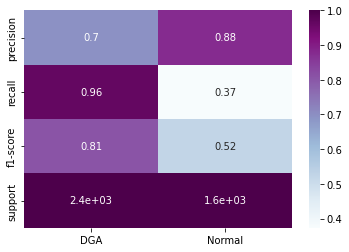

In [67]:
# ANN

clf_report_ann = classification_report(y_test, a, target_names=targetNames, output_dict= True)
cleaned_report_ann = {}

cleaned_report_ann['DGA'] = clf_report_ann['DGA']
cleaned_report_ann['Normal'] = clf_report_ann['Normal']

print('For ANN, Confusion Matrix: ')
print(cm_ann)
sns.heatmap(pd.DataFrame(cleaned_report_ann), annot=True, vmax=1.0, cmap="BuPu")

For CNN, Confusion Matrix: 
[[   0 2388]
 [   0 1612]]


<AxesSubplot:>

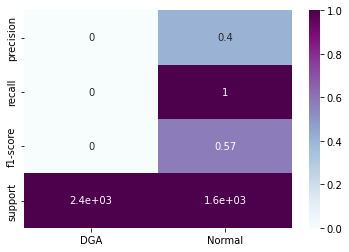

In [68]:
# CNN

clf_report_cnn = classification_report(y_test, c, target_names=targetNames, output_dict= True)
cleaned_report_cnn = {}

cleaned_report_cnn['DGA'] = clf_report_cnn['DGA']
cleaned_report_cnn['Normal'] = clf_report_cnn['Normal']

print('For CNN, Confusion Matrix: ')
print(cm_cnn)
sns.heatmap(pd.DataFrame(cleaned_report_cnn), annot=True, vmax=1.0, cmap="BuPu")

For LSTM, Confusion Matrix: 
[[1349 1039]
 [1143  469]]


<AxesSubplot:>

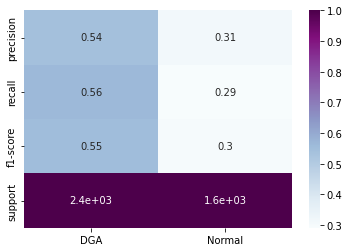

In [69]:
# LSTM

clf_report_lstm = classification_report(y_test, l, target_names=targetNames, output_dict= True)
cleaned_report_lstm = {}

cleaned_report_lstm['DGA'] = clf_report_lstm['DGA']
cleaned_report_lstm['Normal'] = clf_report_lstm['Normal']

print('For LSTM, Confusion Matrix: ')
print(cm_lstm)
sns.heatmap(pd.DataFrame(cleaned_report_lstm), annot=True, vmax=1.0, cmap="BuPu")

For RNN, Confusion Matrix: 
[[2025  363]
 [1294  318]]


<AxesSubplot:>

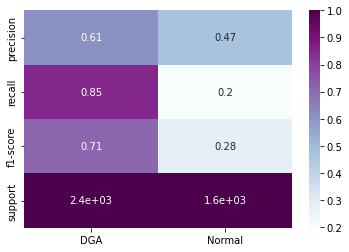

In [70]:
# RNN

clf_report_rnn = classification_report(y_test, r, target_names=targetNames, output_dict= True)
cleaned_report_rnn = {}

cleaned_report_rnn['DGA'] = clf_report_rnn['DGA']
cleaned_report_rnn['Normal'] = clf_report_rnn['Normal']

print('For RNN, Confusion Matrix: ')
print(cm_rnn)
sns.heatmap(pd.DataFrame(cleaned_report_rnn), annot=True, vmax=1.0, cmap="BuPu")

# Visualization of Algorithm Evaluation Metrics

In [71]:
accuracies = {"ANN": ann_acc,  
             "CNN": cnn_acc, 
             "LSTM": lstm_acc,
             "RNN": rnn_acc
             }

precisions = {"ANN": pre_ann,  
             "CNN": pre_cnn, 
             "LSTM": pre_lstm,
              "RNN" : pre_rnn
             }

recalls = {"ANN": rec_ann,  
             "CNN": rec_cnn, 
             "LSTM": rec_lstm,
             "RNN": rec_rnn
             }

f1s = {"ANN": f1_ann,  
             "CNN": f1_cnn, 
             "LSTM": f1_lstm,
             "RNN": rec_rnn,
             }

spex = {"ANN": spec_ann,  
             "CNN": spec_cnn, 
             "LSTM": spec_lstm,
             "RNN": spec_rnn,
             }

In [72]:
print("Classification models in descending order of Accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Accuracy:


[('ANN', 0.7268750071525574),
 ('LSTM', 0.5576249957084656),
 ('RNN', 0.5400624871253967),
 ('CNN', 0.5048750042915344)]

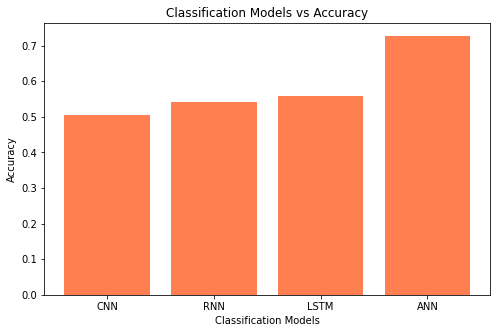

In [73]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="coral")
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [74]:
print("Classification models in descending order of Precision:")
sorted(precisions.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Precision:


[('ANN', 0.87627365356623),
 ('RNN', 0.4669603524229075),
 ('CNN', 0.403),
 ('LSTM', 0.3110079575596817)]

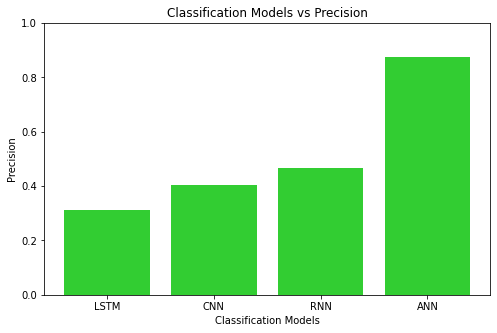

In [75]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="limegreen")
plt.ylim(0,1)
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

In [76]:
print("Classification models in descending order of Recall:")
sorted(recalls.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of Recall:


[('CNN', 1.0),
 ('ANN', 0.37344913151364767),
 ('LSTM', 0.29094292803970223),
 ('RNN', 0.19727047146401985)]

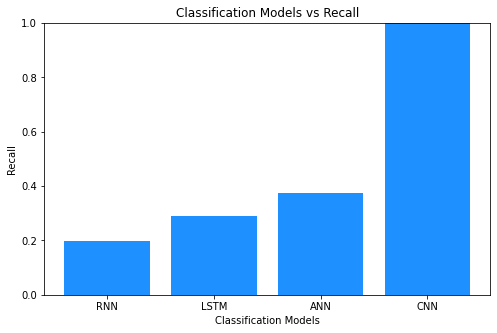

In [77]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

In [78]:
print("Classification models in descending order of F1:")
sorted(f1s.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of F1:


[('CNN', 0.5744832501781896),
 ('ANN', 0.5237059591126576),
 ('LSTM', 0.3006410256410256),
 ('RNN', 0.19727047146401985)]

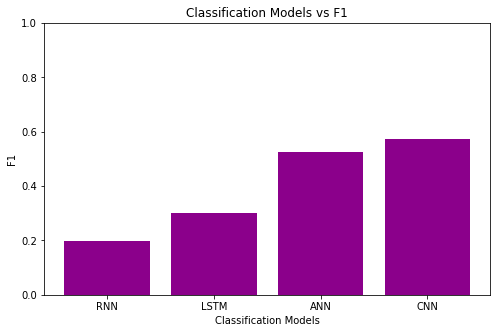

In [79]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.ylim(0,1)
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

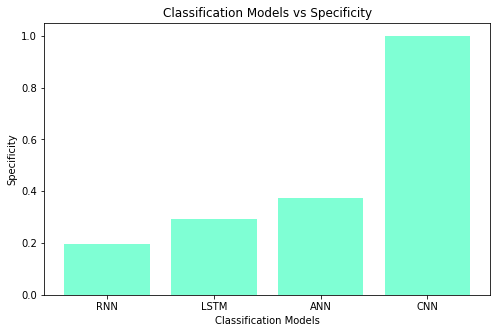

In [80]:
lists = sorted(spex.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples

plt.figure(figsize=(8,5))
plt.bar(*zip(*lists), color="aquamarine")
plt.title('Classification Models vs Specificity')
plt.xlabel('Classification Models')
plt.ylabel('Specificity')
plt.show()
# print("\t\t\t\t\t\t   CNN bad, sona good ;)")